# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
images = os.listdir("images")
print(len(images))

3642


In [4]:
train = [t for t in images if "Train" in t]
test = [t for t in images if "Test" in t]

In [5]:
print("Train: ", len(train))
print("Test: ", len(test))

Train:  1821
Test:  1821


In [6]:
train_csv = pd.read_csv("train.csv")
train_csv.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [7]:
train_csv[train_csv["healthy"]==1]

image_id  healthy  multiple_diseases  rust  scab
2        Train_2        1                  0     0     0
4        Train_4        1                  0     0     0
5        Train_5        1                  0     0     0
9        Train_9        1                  0     0     0
13      Train_13        1                  0     0     0
...          ...      ...                ...   ...   ...
1808  Train_1808        1                  0     0     0
1810  Train_1810        1                  0     0     0
1814  Train_1814        1                  0     0     0
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0

[516 rows x 5 columns]

## Count Category Label

In [8]:
len(train_csv[train_csv["healthy"]==1])

516

In [9]:
len(train_csv[train_csv["rust"]==1])

622

In [10]:
len(train_csv[train_csv["scab"]==1])

592

In [11]:
len(train_csv[train_csv["multiple_diseases"]==1])

91

### Read Csv

In [12]:
train_csv.shape

(1821, 5)

In [13]:
test_csv = pd.read_csv("test.csv")
test_csv.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [14]:
submission_csv = pd.read_csv("sample_submission.csv")
submission_csv.head()

image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25

### Read image and resize

In [15]:
train_images = []

for i in train_csv["image_id"]:
    img = cv2.imread("images/"+i+".jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150,150),interpolation=cv2.INTER_AREA)
    train_images.append(img)

### Visualize

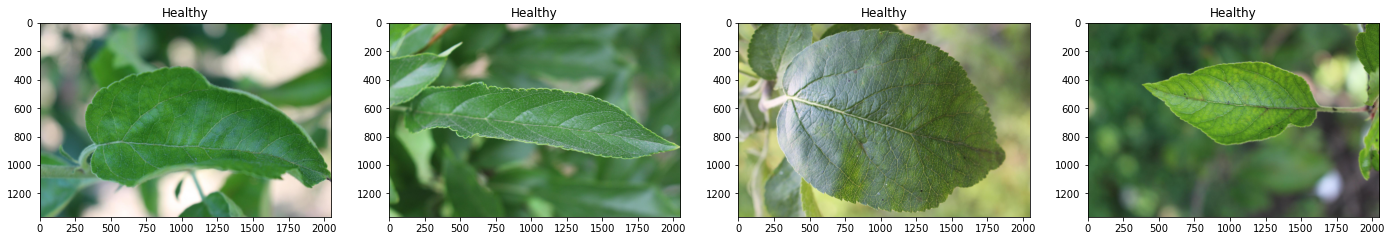

In [16]:
import matplotlib.image as mpimg

temp = train_csv[train_csv['healthy'] ==1]
img_ids = ['images/'+i+'.jpg' for i in temp['image_id']]


# Plotting the healthy images
plt.figure(figsize = (24,5))
for ind, img in enumerate(img_ids[:4]):
    plt.subplot(1,4,ind+1)
    image = mpimg.imread(img)
    plt.title("Healthy")
    plt.imshow(image)

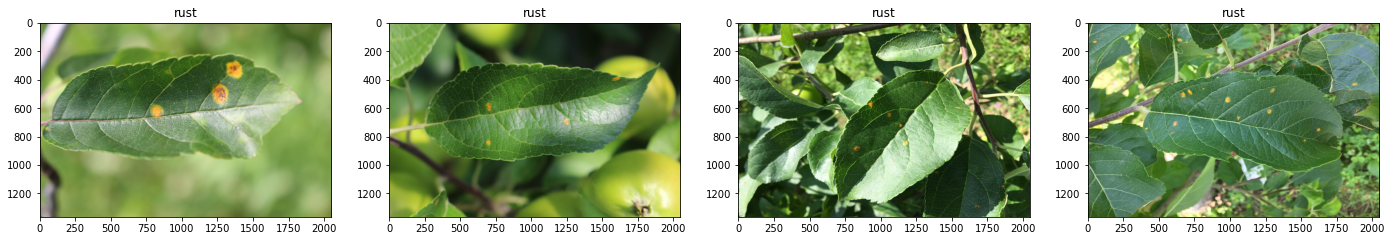

In [17]:
import matplotlib.image as mpimg

temp = train_csv[train_csv['rust'] ==1]
img_ids = ['images/'+i+'.jpg' for i in temp['image_id']]


# Plotting the healthy images
plt.figure(figsize = (24,5))
for ind, img in enumerate(img_ids[:4]):
    plt.subplot(1,4,ind+1)
    image = mpimg.imread(img)
    plt.title('rust')
    plt.imshow(image)

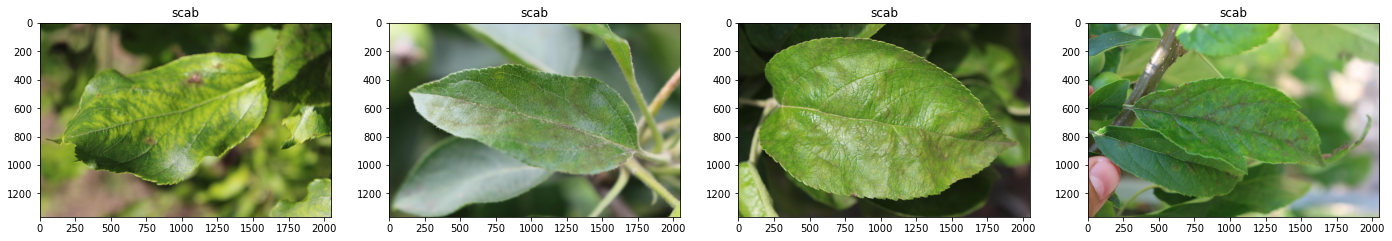

In [18]:
import matplotlib.image as mpimg

temp = train_csv[train_csv['scab'] ==1]
img_ids = ['images/'+i+'.jpg' for i in temp['image_id']]


# Plotting the healthy images
plt.figure(figsize = (24,5))
for ind, img in enumerate(img_ids[:4]):
    plt.subplot(1,4,ind+1)
    image = mpimg.imread(img)
    plt.title('scab')
    plt.imshow(image)

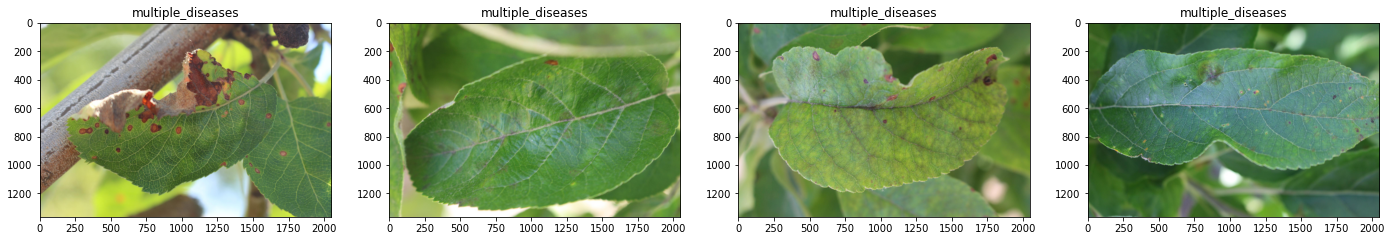

In [19]:
import matplotlib.image as mpimg

temp = train_csv[train_csv['multiple_diseases'] ==1]
img_ids = ['images/'+i+'.jpg' for i in temp['image_id']]


# Plotting the healthy images
plt.figure(figsize = (24,5))
for ind, img in enumerate(img_ids[:4]):
    plt.subplot(1,4,ind+1)
    image = mpimg.imread(img)
    plt.title('multiple_diseases')
    plt.imshow(image)

## pie chart

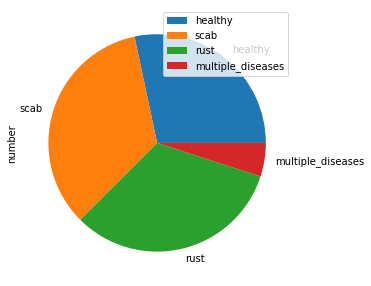

In [20]:
pie = pd.DataFrame({"number":[len(train_csv[train_csv["healthy"]==1]),len(train_csv[train_csv["rust"]==1]),len(train_csv[train_csv["scab"]==1]),len(train_csv[train_csv["multiple_diseases"]==1]),
                                        ]},index = ["healthy","scab","rust","multiple_diseases"])

plot = pie.plot.pie(y='number', figsize=(5, 5))

### value count

Text(0, 0.5, '')

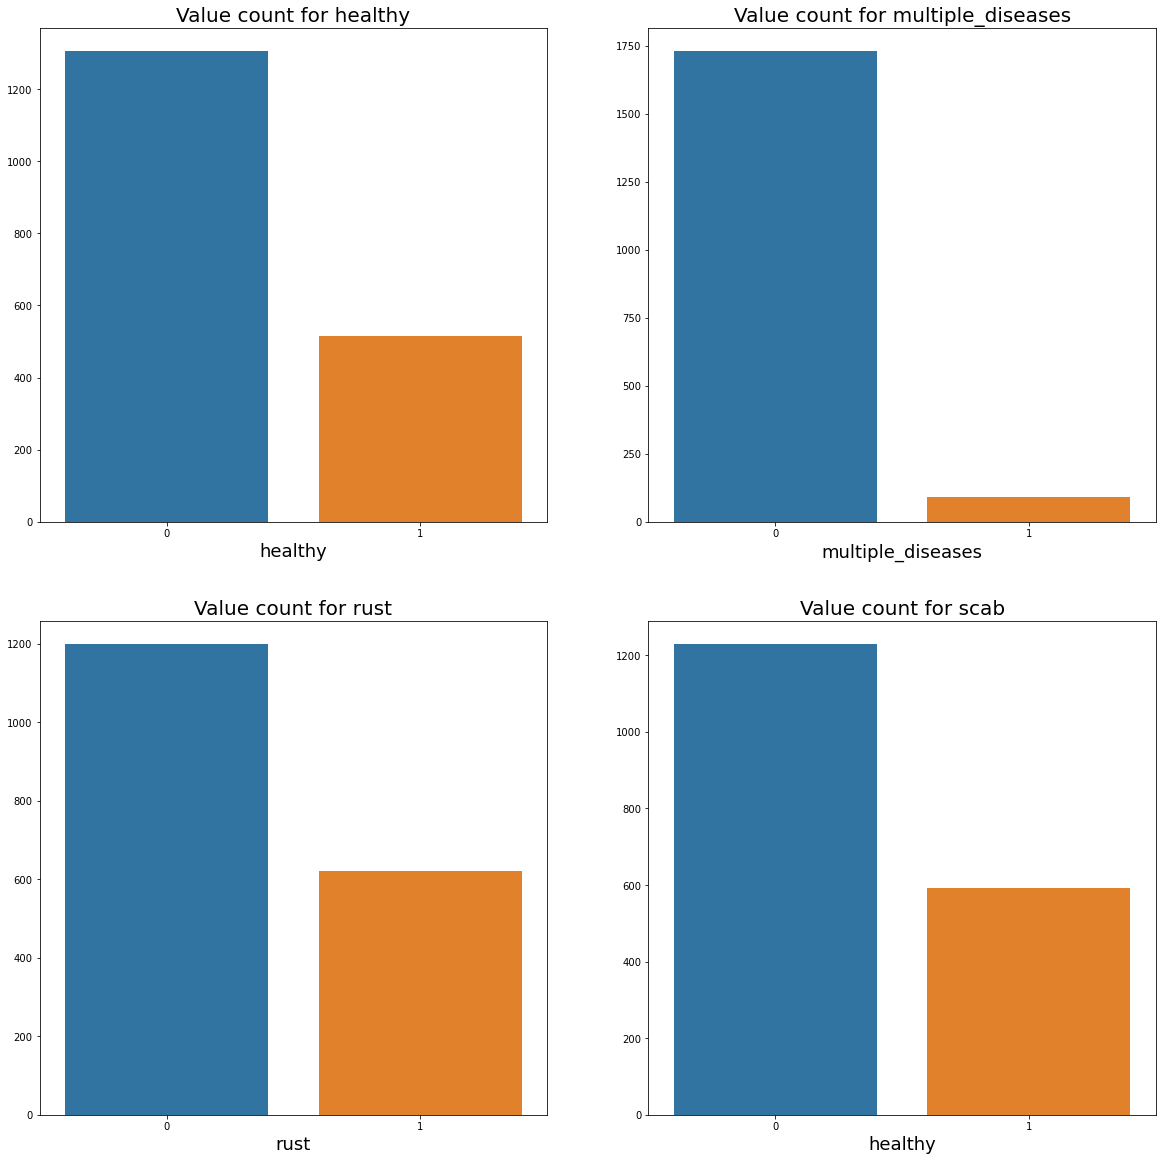

In [21]:
import seaborn as sns

fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.barplot(y=train_csv.healthy.value_counts(),x=train_csv.healthy.value_counts().index,ax=ax[0,0])
ax[0,0].set_title("Value count for healthy",size=20)
ax[0,0].set_xlabel('healthy',size=18)
ax[0,0].set_ylabel('',size=18)

sns.barplot(y=train_csv.multiple_diseases.value_counts(),x=train_csv.multiple_diseases.value_counts().index,ax=ax[0,1])
ax[0,1].set_title("Value count for multiple_diseases",size=20)
ax[0,1].set_xlabel('multiple_diseases',size=18)
ax[0,1].set_ylabel('',size=18)

sns.barplot(y=train_csv.rust.value_counts(),x=train_csv.rust.value_counts().index,ax=ax[1,0])
ax[1,0].set_title("Value count for rust",size=20)
ax[1,0].set_xlabel('rust',size=18)
ax[1,0].set_ylabel('',size=18)

sns.barplot(y=train_csv.scab.value_counts(),x=train_csv.scab.value_counts().index,ax=ax[1,1])
ax[1,1].set_title("Value count for scab",size=20)
ax[1,1].set_xlabel('healthy',size=18)
ax[1,1].set_ylabel('',size=18)

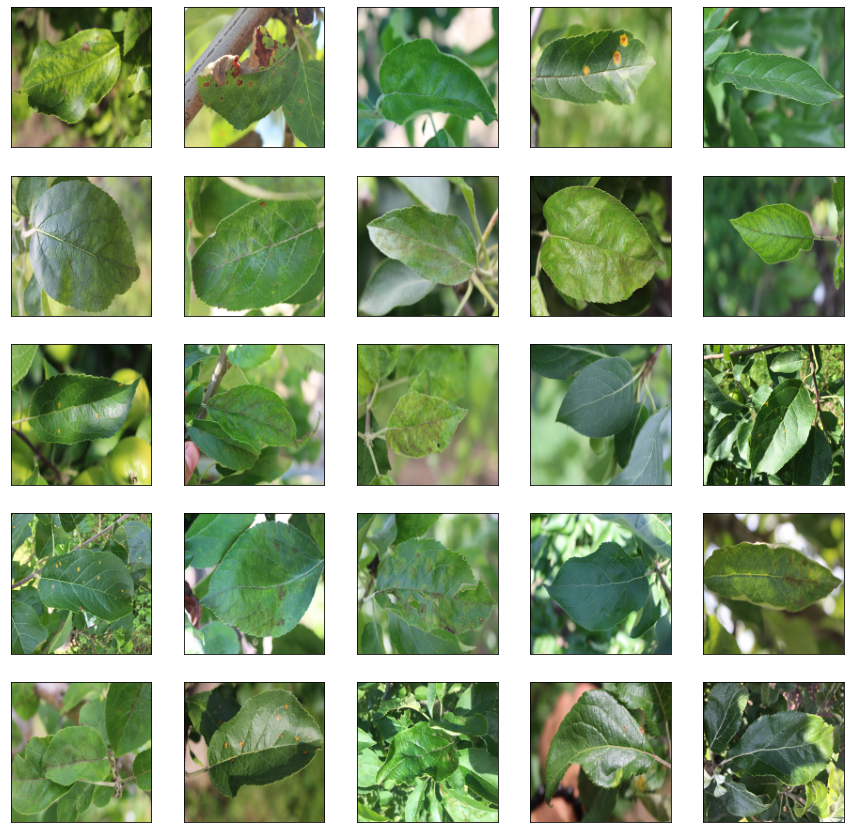

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

In [23]:
y = train_csv.drop('image_id',axis=1)
y = np.array(y)
y.shape

(1821, 4)

In [24]:
X = np.array(train_images)

In [25]:
X = X/255.0    
X.shape 

(1821, 150, 150, 3)

In [26]:
X.shape

(1821, 150, 150, 3)

In [27]:
y.shape

(1821, 4)

# Split the data

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train,y_val = train_test_split(X,y,test_size = .20, random_state = 2)

In [29]:
x_train.shape

(1456, 150, 150, 3)

In [31]:
x_val.shape

(365, 150, 150, 3)

# Construct the Model

In [32]:
from keras.models import Sequential

from keras.layers import Dense, Activation, Conv2D, BatchNormalization,MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D

from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau 

Using TensorFlow backend.


In [47]:
def construct_model() :
    
    model = Sequential()
    
    #Block 1
    model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(150,150,3)))
    model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.3))
    
    #Block 2
    
    model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.3))

    #Block 3
    
    model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
    model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
    model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.2))
    
    #Block 4 
    
    model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.2))    
    
    
    
    
    
    #Block 5
    
    model.add(Conv2D(1024,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(1024,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.2))

    
    #Final Block
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(4,activation='softmax'))
        
    #Compile
    
    model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    
    
    return model  

In [48]:
model = construct_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 75, 128)       73856     
__________

# Data Augmentation on the fly

In [33]:
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [50]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)


In [51]:

train_generator = train_datagen.flow(x_train,y_train, batch_size = 32)
val_generator = val_datagen.flow(x_val, y_val, batch_size = 32)



In [42]:
# Save the model according to the conditions  

reduce_lr =  ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 10,verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,
                               min_lr = 1e-5)
checkpoint = ModelCheckpoint("CNN.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


C:\Users\shihab\.conda\envs\shihab\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


# Train the Model 

In [54]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = len(x_train)//8,
                             epochs = 120,
                             validation_data = val_generator,
                             validation_steps= len(x_val)//8,
                            callbacks = [checkpoint, early])

Epoch 1/120
182/182 [==============================] - 149s 818ms/step - loss: 1.2439 - acc: 0.3795 - val_loss: 1.6740 - val_acc: 0.2522

Epoch 00001: val_loss improved from 2.46797 to 1.67395, saving model to CNN.h5
Epoch 2/120
182/182 [==============================] - 149s 819ms/step - loss: 1.2265 - acc: 0.3942 - val_loss: 3.1303 - val_acc: 0.2487

Epoch 00002: val_loss did not improve from 1.67395
Epoch 3/120
182/182 [==============================] - 149s 819ms/step - loss: 1.2121 - acc: 0.3970 - val_loss: 1.2515 - val_acc: 0.3600

Epoch 00003: val_loss improved from 1.67395 to 1.25153, saving model to CNN.h5
Epoch 4/120
182/182 [==============================] - 149s 820ms/step - loss: 1.2055 - acc: 0.4143 - val_loss: 3.3772 - val_acc: 0.2625

Epoch 00004: val_loss did not improve from 1.25153
Epoch 5/120
182/182 [==============================] - 149s 818ms/step - loss: 1.2011 - acc: 0.4104 - val_loss: 1.3705 - val_acc: 0.2060

Epoch 00005: val_loss did not improve from 1.25153

In [57]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]



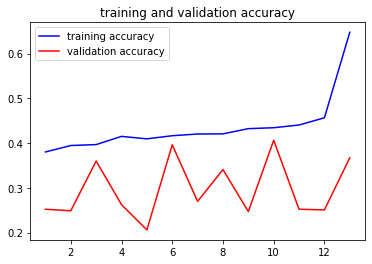

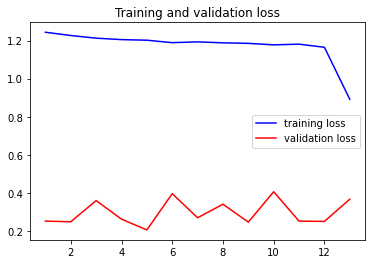

In [59]:
epochs = range(1, len(acc)+1)

# Train and validation accuracy

plt.plot(epochs,acc, "b", label = "training accuracy")
plt.plot(epochs, val_acc, "r", label = "validation accuracy")
plt.title("training and validation accuracy")
plt.legend()

plt.figure()
#train and validation loss
plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_acc, "r", label= "validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

# Test Image

In [34]:
test_images = []
for x in test_csv["image_id"]:


    test_image = cv2.imread("images/"+x+".jpg")
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image = cv2.resize(test_image, (150,150),interpolation=cv2.INTER_AREA)
    test_images.append(test_image)
    


In [35]:
 plt.imshow(test_images[3])

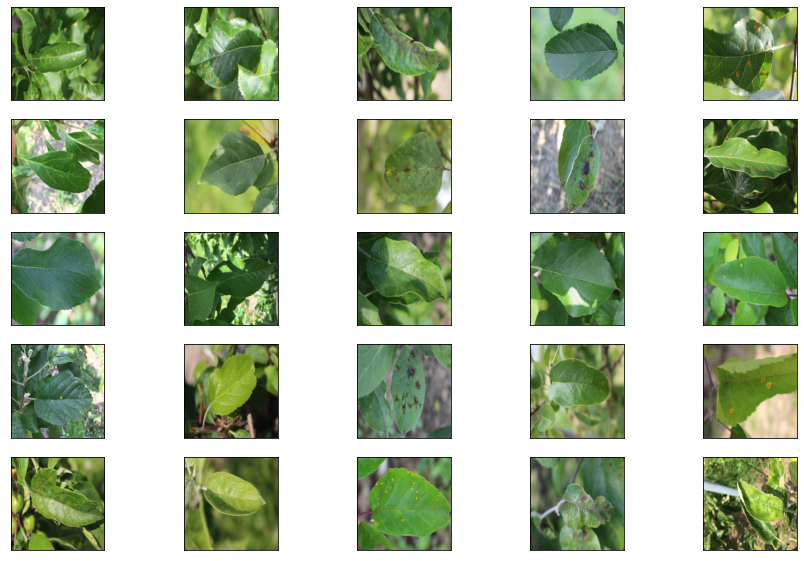

In [36]:
plt.figure(figsize=(15,10))


for x in range(25):
    
    plt.subplot(5,5,x+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[x])

In [37]:
x_test = np.array(test_images)

x_test = x_test/255

In [38]:
len(x_test)

1821

# Predict the Test Data

In [65]:
predictions = model.predict(x_test)

In [66]:
predictions

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [67]:
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])

results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_cnn = pd.DataFrame(results)
#df_results_cnn.to_csv('submissionCNN.csv',index=False) #0.926

In [68]:
pd.set_option('max_rows', 2000)

In [69]:
#df_results_cnn

## Data Augmentation for Transfer Learning

In [39]:
#from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [40]:


data_gen = ImageDataGenerator(rotation_range=45,
                              horizontal_flip=True,
                              vertical_flip=True,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range = 0.1,
                              shear_range = 0.1,
                              #brightness_range = [0.5,1.5],
                              fill_mode = 'nearest')
data_gen.fit(X)

In [41]:
img_size = 150

# Transfer Learning

In [42]:
from keras.models import Model
from keras.applications import DenseNet121
from keras.applications import vgg16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications import MobileNet
from keras.applications import InceptionResNetV2
#import efficientnet.keras as efn

In [43]:
#!pip install efficientnet
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in c:\users\shihab\.conda\envs\shihab\lib\site-packages (1.1.0)


In [44]:
#import efficientnet.keras as efn
from efficientnet.keras import EfficientNetB6

In [45]:
# 0.936

def construct_transfer_learning_model(model_name) :
    if model_name == 'MobileNet' :
        base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))#imports the mobilenet model and discards the last 1000 neuron layer.
        base_model.trainable = True
        for layer in base_model.layers[:-3] :
            layer.trainable = True
    elif model_name == 'VGG16' : 
        base_model=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
        base_model.trainable = True
        for layer in base_model.layers[:-3] :
            layer.trainable = True
    elif model_name == 'DenseNet' :
        base_model = DenseNet121(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
        base_model.trainable = True
        for layer in base_model.layers[:-3] :
            layer.trainable = True
    elif model_name == 'Inception' :
        base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
        base_model.trainable = True
        for layer in base_model.layers[:-3] :
            layer.trainable = True
    elif model_name == 'ResNet' :
        base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
        base_model.trainable = True
        for layer in base_model.layers[:-3] :
            layer.trainable = True

            
    elif model_name == 'InceptionResNetV2' :
        base_model = InceptionResNetV2(weights = 'imagenet', include_top=False, input_shape = (img_size,img_size,3))
        base_model.trainable = True
        for layer in base_model.layers[:-3] :
            layer.trainable = True

    elif model_name == 'EfficientNet' :
        base_model = EfficientNetB6(weights='imagenet',input_shape=(150,150,3),include_top=False,pooling='max')
        base_model.trainable = True
        for layer in base_model.layers[:-1] :
            layer.trainable = True

    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(512,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
    #x=Dropout(0.3)(x)
    x=Dense(64,activation='relu')(x) #dense layer 2
    preds=Dense(4,activation='softmax')(x) #final layer with softmax activation
    model=Model(inputs=base_model.input,outputs=preds)
    model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

In [46]:
def plot_performance_transfer_learning(history) :
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    t = f.suptitle('TL Performance', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    #epoch_list = list(range(1,121))
    acc = history.history["acc"]
    epoch_list = range(1, len(acc)+1)
    ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
    #ax1.set_xticks(np.arange(0, 121, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    #ax2.set_xticks(np.arange(0, 121, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

In [47]:
# Save the model according to the conditions  

checkpoint = ModelCheckpoint("CNN.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


### Mobilenet

In [52]:
model = construct_transfer_learning_model('MobileNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch = x_train.shape[0] // 32,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint, early]
                   )

C:\Users\shihab\.conda\envs\shihab\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/120
45/45 [==============================] - 18s 406ms/step - loss: 0.7070 - acc: 0.7493 - val_loss: 1.1766 - val_acc: 0.7534

Epoch 00001: val_acc improved from -inf to 0.75342, saving model to CNN.h5
Epoch 2/120
45/45 [==============================] - 11s 237ms/step - loss: 0.4193 - acc: 0.8611 - val_loss: 0.6411 - val_acc: 0.8822

Epoch 00002: val_acc improved from 0.75342 to 0.88219, saving model to CNN.h5
Epoch 3/120
45/45 [==============================] - 10s 214ms/step - loss: 0.3957 - acc: 0.8653 - val_loss: 0.4713 - val_acc: 0.8712

Epoch 00003: val_acc did not improve from 0.88219
Epoch 4/120
45/45 [==============================] - 10s 214ms/step - loss: 0.3364 - acc: 0.8972 - val_loss: 0.4895 - val_acc: 0.8877

Epoch 00004: val_acc improved from 0.88219 to 0.88767, saving model to CNN.h5
Epoch 5/120
45/45 [==============================] - 10s 214ms/step - loss: 

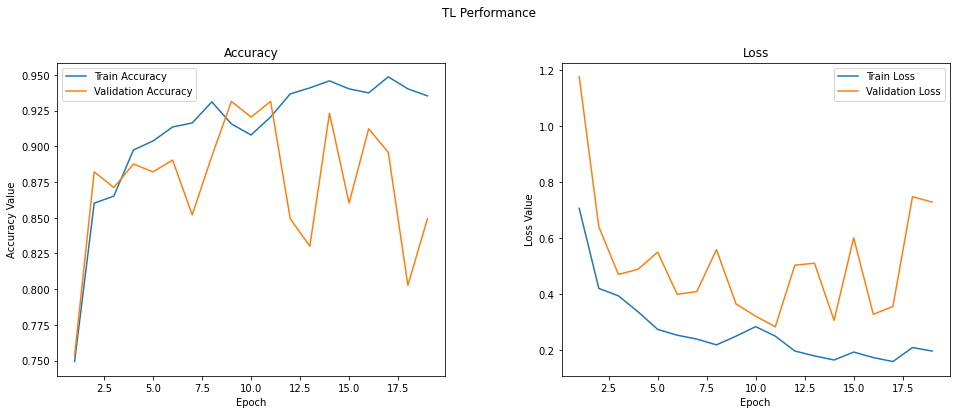

In [53]:
plot_performance_transfer_learning(history)

In [54]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_mobilenet10 = pd.DataFrame(results)
df_results_mobilenet10.to_csv('submissionMobileNet.csv',index=False) #0.923

### vgg16

In [55]:
model = construct_transfer_learning_model('VGG16')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch = x_train.shape[0] // 32,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint, early])


Epoch 1/120
45/45 [==============================] - 35s 775ms/step - loss: 10.9384 - acc: 0.3000 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00001: val_acc did not improve from 0.93151
Epoch 2/120
45/45 [==============================] - 29s 646ms/step - loss: 11.4387 - acc: 0.2903 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00002: val_acc did not improve from 0.93151
Epoch 3/120
45/45 [==============================] - 26s 582ms/step - loss: 11.5066 - acc: 0.2861 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00003: val_acc did not improve from 0.93151
Epoch 4/120
45/45 [==============================] - 26s 580ms/step - loss: 11.3618 - acc: 0.2951 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00004: val_acc did not improve from 0.93151
Epoch 5/120
45/45 [==============================] - 26s 582ms/step - loss: 11.4283 - acc: 0.2910 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00005: val_acc did not improve from 0.93151
Epoch 6/120
45/45 [==============================] - 26s 586ms/s

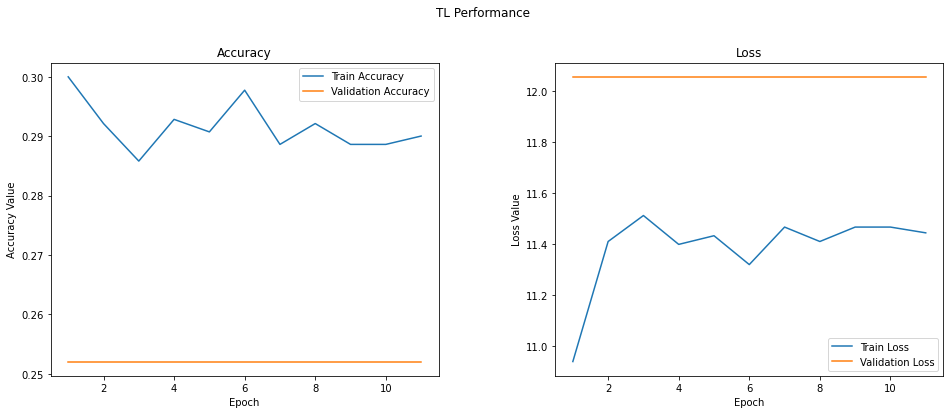

In [56]:
plot_performance_transfer_learning(history)

In [57]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_vgg = pd.DataFrame(results)
df_results_vgg.to_csv('submissionvgg16.csv',index=False) #0.923

### Resnet

In [58]:
model = construct_transfer_learning_model('ResNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch = x_train.shape[0] // 32,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint, early])

C:\Users\shihab\.conda\envs\shihab\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/120
45/45 [==============================] - 39s 876ms/step - loss: 0.9127 - acc: 0.7083 - val_loss: 8.2839 - val_acc: 0.3918

Epoch 00001: val_acc did not improve from 0.93151
Epoch 2/120
45/45 [==============================] - 27s 611ms/step - loss: 0.5654 - acc: 0.8111 - val_loss: 1.3744 - val_acc: 0.4329

Epoch 00002: val_acc did not improve from 0.93151
Epoch 3/120
45/45 [==============================] - 26s 578ms/step - loss: 0.4635 - acc: 0.8618 - val_loss: 2.6337 - val_acc: 0.5534

Epoch 00003: val_acc did not improve from 0.93151
Epoch 4/120
45/45 [==============================] - 26s 577ms/step - loss: 0.4004 - acc: 0.8688 - val_loss: 2.8433 - val_acc: 0.4164

Epoch 00004: val_acc did not improve from 0.93151
Epoch 5/120
45/45 [==============================] - 26s 577ms/step - loss: 0.3841 - acc: 0.8847 - val_loss: 3.2848 - val_acc: 0.4877

Epoch 00005: val_acc did not improve from 0.93151
Epoch 6/120
45/45 [==============================] - 26s 577ms/step - loss:

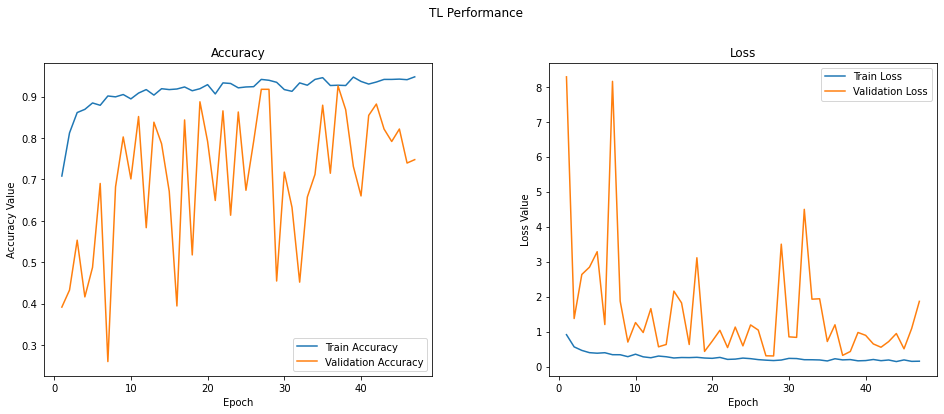

In [59]:
plot_performance_transfer_learning(history)

In [60]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_Resnet = pd.DataFrame(results)
df_results_Resnet.to_csv('submission_Resnet.csv',index=False) #0.923  #0.488

### Inception

In [61]:
model = construct_transfer_learning_model('Inception')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch = x_train.shape[0] // 32,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint, early])


Epoch 1/120
45/45 [==============================] - 39s 873ms/step - loss: 0.8022 - acc: 0.7160 - val_loss: 7.5388 - val_acc: 0.3781

Epoch 00001: val_acc did not improve from 0.93151
Epoch 2/120
45/45 [==============================] - 19s 416ms/step - loss: 0.5671 - acc: 0.8215 - val_loss: 4.7705 - val_acc: 0.5726

Epoch 00002: val_acc did not improve from 0.93151
Epoch 3/120
45/45 [==============================] - 16s 353ms/step - loss: 0.4682 - acc: 0.8570 - val_loss: 8.6548 - val_acc: 0.4164

Epoch 00003: val_acc did not improve from 0.93151
Epoch 4/120
45/45 [==============================] - 16s 352ms/step - loss: 0.3729 - acc: 0.8882 - val_loss: 2.6464 - val_acc: 0.6219

Epoch 00004: val_acc did not improve from 0.93151
Epoch 5/120
45/45 [==============================] - 16s 353ms/step - loss: 0.3678 - acc: 0.8896 - val_loss: 2.2941 - val_acc: 0.7836

Epoch 00005: val_acc did not improve from 0.93151
Epoch 6/120
45/45 [==============================] - 16s 353ms/step - loss

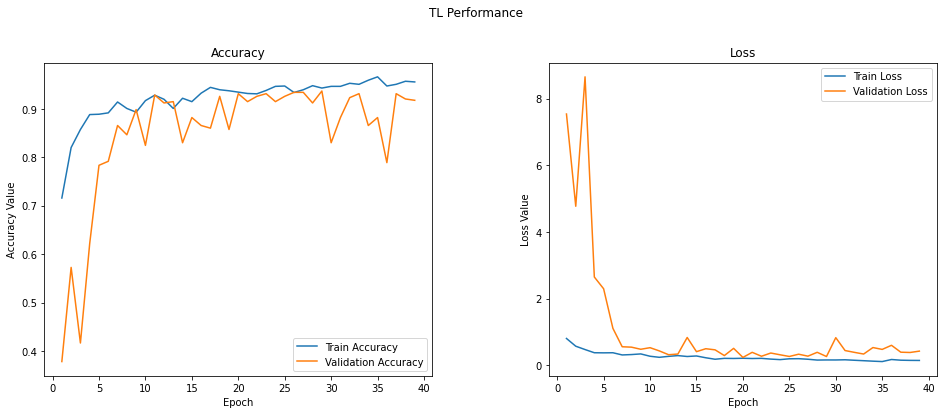

In [62]:
plot_performance_transfer_learning(history)

In [64]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results = pd.DataFrame(results)
df_results.to_csv('submission_inception.csv',index=False)

### InceptionResnet v2

In [53]:
model = construct_transfer_learning_model('InceptionResNetV2')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=8),
                    steps_per_epoch = x_train.shape[0] // 8,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint, early])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/120
182/182 [==============================] - 147s 808ms/step - loss: 0.7765 - acc: 0.7452 - val_loss: 0.8696 - val_acc: 0.7479

Epoch 00001: val_acc improved from -inf to 0.74795, saving model to CNN.h5
Epoch 2/120
182/182 [==============================] - 85s 465ms/step - loss: 0.6004 - acc: 0.8166 - val_loss: 1.1486 - val_acc: 0.7863

Epoch 00002: val_acc improved from 0.74795 to 0.78630, saving model to CNN.h5
Epoch 3/120
182/182 [==============================] - 86s 471ms/step - loss: 0.5075 - acc: 0.8496 - val_loss: 0.4724 - val_acc: 0.8658

Epoch 00003: val_acc improved from 0.78630 to 0.86575, saving model to CNN.h5
Epoch 4/120
182/182 [==============================] - 85s 466ms/step - loss: 0.4793 - acc: 0.8489 - val_loss: 0.8512 - val_acc: 0.8493

Epoch 00004: val_acc did not improve from 0.86575
Epoch 5/120
182/182 [==============================] - 86s 474ms/step - 

In [54]:
plot_performance_transfer_learning(history)

In [55]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results = pd.DataFrame(results)
df_results.to_csv('submission_inceptionResnet.csv',index=False)

### Densenet

In [58]:
model = construct_transfer_learning_model('DenseNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=8),
                    steps_per_epoch = x_train.shape[0] // 8,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint, early])

Epoch 1/120
182/182 [==============================] - 156s 859ms/step - loss: 0.8812 - acc: 0.7005 - val_loss: 0.6934 - val_acc: 0.7726

Epoch 00001: val_acc did not improve from 0.92877
Epoch 2/120
182/182 [==============================] - 51s 283ms/step - loss: 0.6524 - acc: 0.8015 - val_loss: 0.8314 - val_acc: 0.6685

Epoch 00002: val_acc did not improve from 0.92877
Epoch 3/120
182/182 [==============================] - 51s 283ms/step - loss: 0.5730 - acc: 0.8152 - val_loss: 0.8872 - val_acc: 0.7260

Epoch 00003: val_acc did not improve from 0.92877
Epoch 4/120
182/182 [==============================] - 51s 281ms/step - loss: 0.5376 - acc: 0.8201 - val_loss: 0.8437 - val_acc: 0.7397

Epoch 00004: val_acc did not improve from 0.92877
Epoch 5/120
182/182 [==============================] - 51s 280ms/step - loss: 0.4709 - acc: 0.8578 - val_loss: 0.6359 - val_acc: 0.8384

Epoch 00005: val_acc did not improve from 0.92877
Epoch 6/120
182/182 [==============================] - 52s 285ms

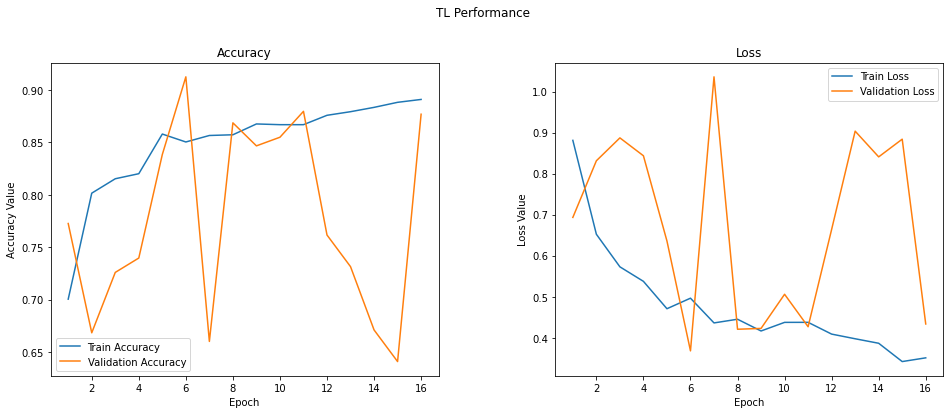

In [59]:
plot_performance_transfer_learning(history)

In [60]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results = pd.DataFrame(results)
df_results.to_csv('submission_dense.csv',index=False)

### EfficientNet

In [48]:
def efficientnet():  
    
    base_model = EfficientNetB6(weights='imagenet',input_shape=(150,150,3),include_top=False,pooling='max')

    base_model.trainable = True
    for layer in base_model.layers[:-1] :
        layer.trainable = True

    x=base_model.output

    x=Dense(512,activation='relu')(x) 
    x=Dense(64,activation='relu')(x) 
    preds=Dense(4,activation='softmax')(x) 
    model=Model(inputs=base_model.input,outputs=preds)
    model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    
    return model

In [49]:
model = efficientnet()  
model.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 75, 75, 56)   1512        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 75, 75, 56)   224         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 75, 75, 56)   0           stem_bn[0][0] 

__________________________________________________________________________________________________
block4f_dwconv (DepthwiseConv2D (None, 10, 10, 864)  7776        block4f_expand_activation[0][0]  
__________________________________________________________________________________________________
block4f_bn (BatchNormalization) (None, 10, 10, 864)  3456        block4f_dwconv[0][0]             
__________________________________________________________________________________________________
block4f_activation (Activation) (None, 10, 10, 864)  0           block4f_bn[0][0]                 
__________________________________________________________________________________________________
block4f_se_squeeze (GlobalAvera (None, 864)          0           block4f_activation[0][0]         
__________________________________________________________________________________________________
block4f_se_reshape (Reshape)    (None, 1, 1, 864)    0           block4f_se_squeeze[0][0]         
__________

block6d_drop (FixedDropout)     (None, 5, 5, 344)    0           block6d_project_bn[0][0]         
__________________________________________________________________________________________________
block6d_add (Add)               (None, 5, 5, 344)    0           block6d_drop[0][0]               
                                                                 block6c_add[0][0]                
__________________________________________________________________________________________________
block6e_expand_conv (Conv2D)    (None, 5, 5, 2064)   710016      block6d_add[0][0]                
__________________________________________________________________________________________________
block6e_expand_bn (BatchNormali (None, 5, 5, 2064)   8256        block6e_expand_conv[0][0]        
__________________________________________________________________________________________________
block6e_expand_activation (Acti (None, 5, 5, 2064)   0           block6e_expand_bn[0][0]          
__________

Non-trainable params: 224,432
__________________________________________________________________________________________________


In [50]:
model = efficientnet()  
#model = construct_transfer_learning_model('EfficientNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=4),
                    steps_per_epoch = x_train.shape[0] // 4,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint, early])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/120
364/364 [==============================] - 356s 979ms/step - loss: 11.4074 - acc: 0.2912 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00001: val_acc improved from -inf to 0.25205, saving model to CNN.h5
Epoch 2/120
364/364 [==============================] - 240s 659ms/step - loss: 11.4244 - acc: 0.2912 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00002: val_acc did not improve from 0.25205
Epoch 3/120
364/364 [==============================] - 231s 635ms/step - loss: 11.4244 - acc: 0.2912 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00003: val_acc did not improve from 0.25205
Epoch 4/120
364/364 [==============================] - 190s 523ms/step - loss: 11.4244 - acc: 0.2912 - val_loss: 12.0555 - val_acc: 0.2521

Epoch 00004: val_acc did not improve from 0.25205
Epoch 5/120
364/364 [==============================] - 191s 526ms/step - loss: 11.4244 - acc: 0.2912 - val_loss: 12.055

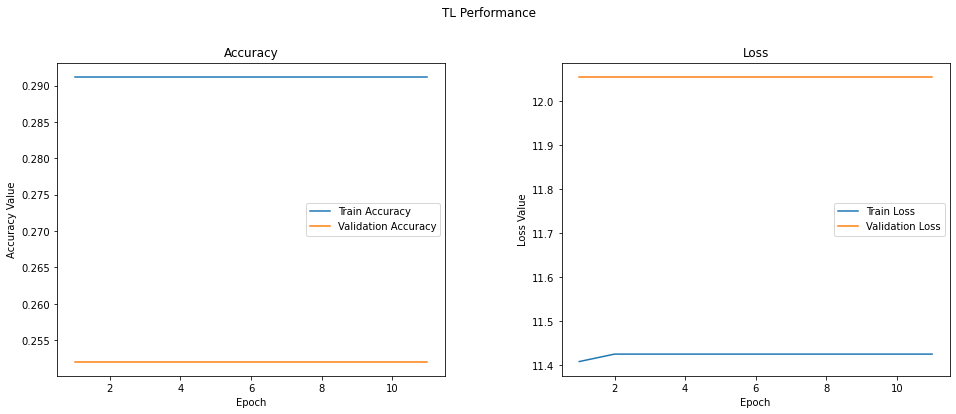

In [51]:
plot_performance_transfer_learning(history)

In [52]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results = pd.DataFrame(results)
df_results.to_csv('submission_efficient.csv',index=False)

# val_loss and reduce learning rate

In [ ]:
# Save the model according to the conditions  

reduce_lr =  ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 10,verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,
                               min_lr = 1e-5)
checkpoint2 = ModelCheckpoint("CNN.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early2 = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


### Mobilenet

In [84]:
model = construct_transfer_learning_model('MobileNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch = x_train.shape[0] // 32,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint2, early2,reduce_lr]
                   )

C:\Users\shihab\.conda\envs\shihab\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Epoch 1/120
45/45 [==============================] - 17s 383ms/step - loss: 0.7301 - acc: 0.7326 - val_loss: 1.1449 - val_acc: 0.7671

Epoch 00001: val_loss improved from 1.25153 to 1.14486, saving model to CNN.h5
Epoch 2/120
45/45 [==============================] - 11s 234ms/step - loss: 0.4585 - acc: 0.8528 - val_loss: 1.1586 - val_acc: 0.8329

Epoch 00002: val_loss did not improve from 1.14486
Epoch 3/120
45/45 [==============================] - 10s 216ms/step - loss: 0.3926 - acc: 0.8750 - val_loss: 0.4067 - val_acc: 0.8740

Epoch 00003: val_loss improved from 1.14486 to 0.40671, saving model to CNN.h5
Epoch 4/120
45/45 [==============================] - 10s 218ms/step - loss: 0.3116 - acc: 0.8986 - val_loss: 0.6432 - val_acc: 0.8959

Epoch 00004: val_loss did not improve from 0.40671
Epoch 5/120
45/45 [==============================] - 10s 217ms/step - loss: 0.3042 - acc: 0.9056 - val_loss: 0.6701 - val_acc: 0.8795

Epoch 00005: val_loss did not improve from 0.40671
Epoch 6/120
45

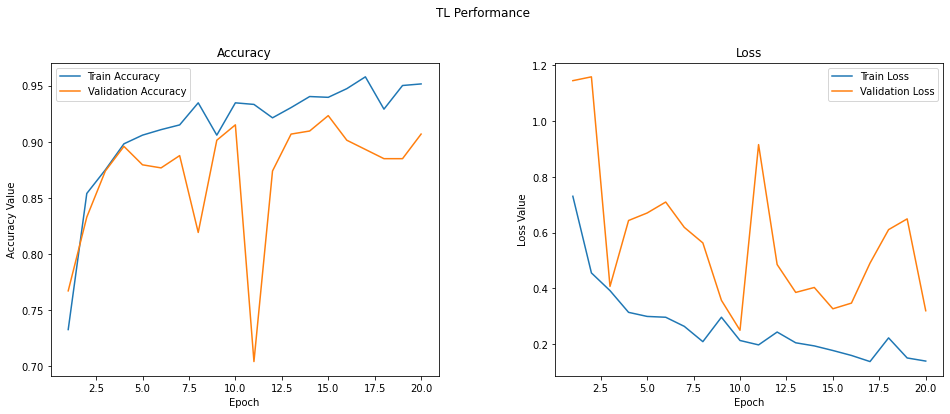

In [85]:
plot_performance_transfer_learning(history)

In [86]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_mobilenet10 = pd.DataFrame(results)
df_results_mobilenet10.to_csv('submissionMobileNet.csv',index=False) #0.923

In [87]:
df_results_mobilenet10.head()

image_id       healthy  multiple_diseases          rust      scab
0   Test_0  4.891430e-04           0.190905  8.064271e-01  0.002179
1   Test_1  1.813450e-04           0.694424  2.998880e-01  0.005506
2   Test_2  3.437343e-07           0.000004  1.423488e-08  0.999995
3   Test_3  9.993467e-01           0.000069  3.938232e-04  0.000191
4   Test_4  3.719621e-05           0.002993  9.969186e-01  0.000052

In [ ]:
#0.910

### vgg16

In [88]:
model = construct_transfer_learning_model('VGG16')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch = x_train.shape[0] // 32,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint2, early2,reduce_lr])

Epoch 1/120
45/45 [==============================] - 34s 752ms/step - loss: 1.5142 - acc: 0.3278 - val_loss: 1.2433 - val_acc: 0.3342

Epoch 00001: val_loss did not improve from 0.24945
Epoch 2/120
45/45 [==============================] - 29s 648ms/step - loss: 1.2568 - acc: 0.3174 - val_loss: 1.2479 - val_acc: 0.3616

Epoch 00002: val_loss did not improve from 0.24945
Epoch 3/120
45/45 [==============================] - 26s 589ms/step - loss: 1.2539 - acc: 0.3098 - val_loss: 1.2438 - val_acc: 0.3616

Epoch 00003: val_loss did not improve from 0.24945
Epoch 4/120
45/45 [==============================] - 27s 590ms/step - loss: 1.2464 - acc: 0.3111 - val_loss: 1.2402 - val_acc: 0.3342

Epoch 00004: val_loss did not improve from 0.24945
Epoch 5/120
45/45 [==============================] - 27s 589ms/step - loss: 1.2511 - acc: 0.3292 - val_loss: 1.2350 - val_acc: 0.4110

Epoch 00005: val_loss did not improve from 0.24945
Epoch 6/120
45/45 [==============================] - 26s 585ms/step - 

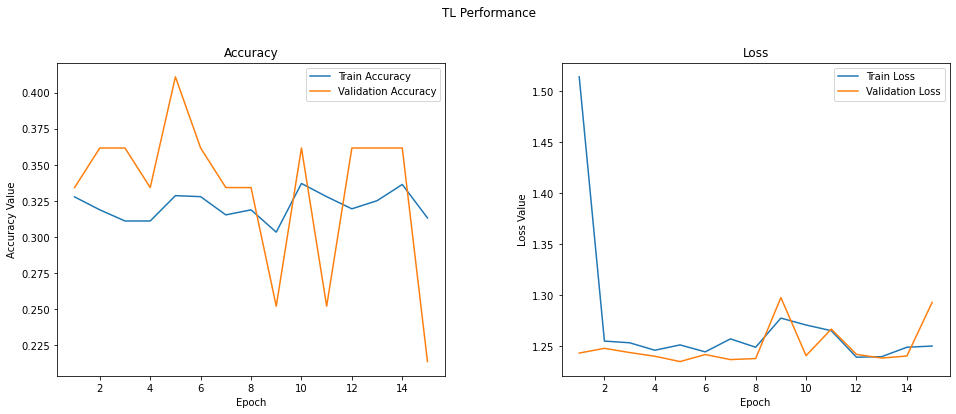

In [89]:
plot_performance_transfer_learning(history)

In [90]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_vgg16 = pd.DataFrame(results)
df_results_vgg16.to_csv('submission_vgg16.csv',index=False) #0.923

In [91]:
df_results_vgg16.head()

image_id   healthy  multiple_diseases      rust      scab
0   Test_0  0.303904           0.134885  0.292029  0.269181
1   Test_1  0.299171           0.131740  0.293929  0.275159
2   Test_2  0.306860           0.135290  0.291372  0.266479
3   Test_3  0.309613           0.135237  0.290788  0.264361
4   Test_4  0.306486           0.136744  0.290953  0.265817

In [ ]:
# 0.513

### Resnet

In [93]:
model = construct_transfer_learning_model('ResNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=8),
                    steps_per_epoch = x_train.shape[0] // 8,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint2, early2,reduce_lr])

Epoch 1/120
182/182 [==============================] - 62s 339ms/step - loss: 1.3063 - acc: 0.4375 - val_loss: 2.5066 - val_acc: 0.4493

Epoch 00001: val_loss did not improve from 0.24945
Epoch 2/120
182/182 [==============================] - 45s 248ms/step - loss: 0.9960 - acc: 0.6587 - val_loss: 2.6735 - val_acc: 0.5671

Epoch 00002: val_loss did not improve from 0.24945
Epoch 3/120
182/182 [==============================] - 45s 246ms/step - loss: 0.7837 - acc: 0.7466 - val_loss: 2.3641 - val_acc: 0.5370

Epoch 00003: val_loss did not improve from 0.24945
Epoch 4/120
182/182 [==============================] - 45s 246ms/step - loss: 0.6979 - acc: 0.7761 - val_loss: 0.9697 - val_acc: 0.7699

Epoch 00004: val_loss did not improve from 0.24945
Epoch 5/120
182/182 [==============================] - 45s 245ms/step - loss: 0.6430 - acc: 0.7850 - val_loss: 0.9871 - val_acc: 0.7562

Epoch 00005: val_loss did not improve from 0.24945
Epoch 6/120
182/182 [==============================] - 45s 2

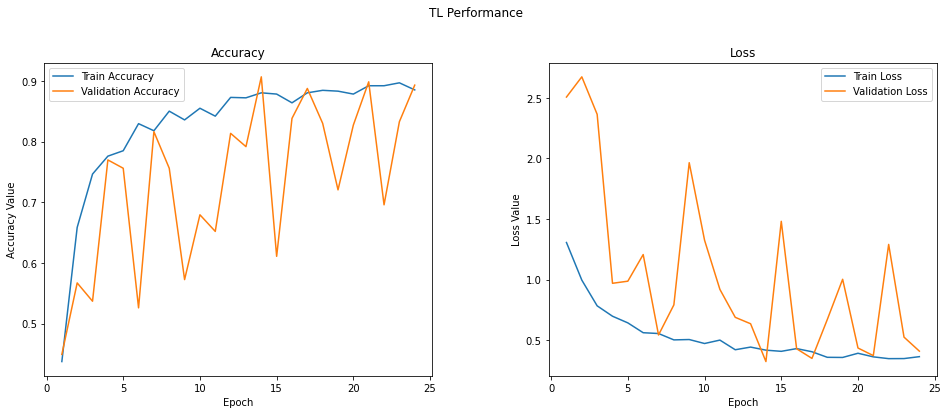

In [94]:
plot_performance_transfer_learning(history)

In [95]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_Resnet = pd.DataFrame(results)
df_results_Resnet.to_csv('submission_Resnet.csv',index=False) #0.923  #0.488

In [96]:
df_results_Resnet.head()

image_id   healthy  multiple_diseases      rust          scab
0   Test_0  0.004866           0.046795  0.946725  1.613975e-03
1   Test_1  0.000961           0.029611  0.968968  4.602421e-04
2   Test_2  0.000626           0.013888  0.000023  9.854637e-01
3   Test_3  0.994495           0.000901  0.000085  4.518172e-03
4   Test_4  0.020035           0.000029  0.979935  2.908880e-12

In [ ]:
#0.917

### Inception 

In [97]:
model = construct_transfer_learning_model('Inception')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch = x_train.shape[0] // 32,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint2, early2,reduce_lr])


Epoch 1/120
45/45 [==============================] - 51s 1s/step - loss: 0.8552 - acc: 0.7049 - val_loss: 8.6825 - val_acc: 0.3753

Epoch 00001: val_loss did not improve from 0.24945
Epoch 2/120
45/45 [==============================] - 19s 415ms/step - loss: 0.4937 - acc: 0.8569 - val_loss: 0.6354 - val_acc: 0.8548

Epoch 00002: val_loss did not improve from 0.24945
Epoch 3/120
45/45 [==============================] - 16s 357ms/step - loss: 0.4116 - acc: 0.8750 - val_loss: 0.6110 - val_acc: 0.8247

Epoch 00003: val_loss did not improve from 0.24945
Epoch 4/120
45/45 [==============================] - 16s 358ms/step - loss: 0.3614 - acc: 0.8938 - val_loss: 0.8767 - val_acc: 0.8055

Epoch 00004: val_loss did not improve from 0.24945
Epoch 5/120
45/45 [==============================] - 16s 357ms/step - loss: 0.3695 - acc: 0.8889 - val_loss: 0.5380 - val_acc: 0.8904

Epoch 00005: val_loss did not improve from 0.24945
Epoch 6/120
45/45 [==============================] - 16s 357ms/step - lo

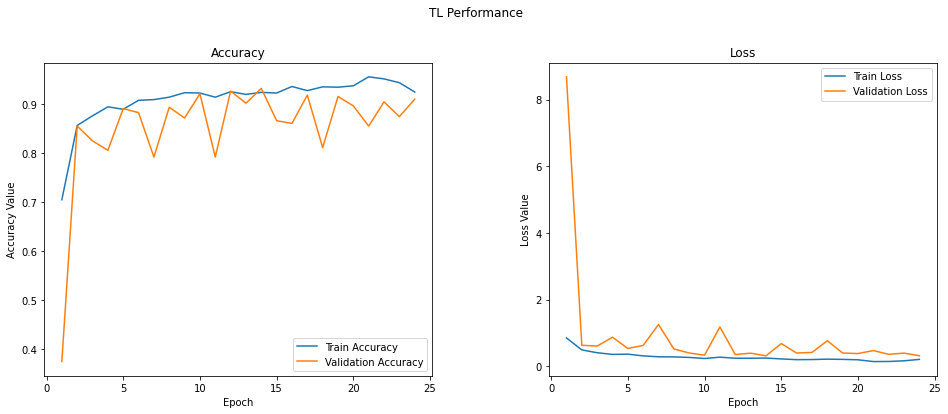

In [98]:
plot_performance_transfer_learning(history)

In [99]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_inception = pd.DataFrame(results)
df_results_inception.to_csv('submission_Inception.csv',index=False) #0.923 ##0.881

In [100]:
df_results_inception.head()

image_id   healthy  multiple_diseases      rust      scab
0   Test_0  0.000106           0.002578  0.997309  0.000006
1   Test_1  0.002404           0.011305  0.985877  0.000414
2   Test_2  0.025594           0.019658  0.000860  0.953889
3   Test_3  0.994298           0.001622  0.004079  0.000001
4   Test_4  0.000108           0.008487  0.991390  0.000015

In [ ]:
# 0.911

## Dense Net 

In [101]:
model = construct_transfer_learning_model('DenseNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=8),
                    steps_per_epoch = x_train.shape[0] // 8,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint2, early2,reduce_lr])

Epoch 1/120
182/182 [==============================] - 91s 498ms/step - loss: 0.8813 - acc: 0.7033 - val_loss: 2.0864 - val_acc: 0.4329

Epoch 00001: val_loss did not improve from 0.24945
Epoch 2/120
182/182 [==============================] - 41s 226ms/step - loss: 0.6552 - acc: 0.7740 - val_loss: 3.1330 - val_acc: 0.6521

Epoch 00002: val_loss did not improve from 0.24945
Epoch 3/120
182/182 [==============================] - 41s 225ms/step - loss: 0.6299 - acc: 0.8036 - val_loss: 0.8013 - val_acc: 0.7616

Epoch 00003: val_loss did not improve from 0.24945
Epoch 4/120
182/182 [==============================] - 41s 225ms/step - loss: 0.5855 - acc: 0.8235 - val_loss: 0.7979 - val_acc: 0.7397

Epoch 00004: val_loss did not improve from 0.24945
Epoch 5/120
182/182 [==============================] - 41s 225ms/step - loss: 0.5111 - acc: 0.8345 - val_loss: 0.5085 - val_acc: 0.8548

Epoch 00005: val_loss did not improve from 0.24945
Epoch 6/120
182/182 [==============================] - 41s 2

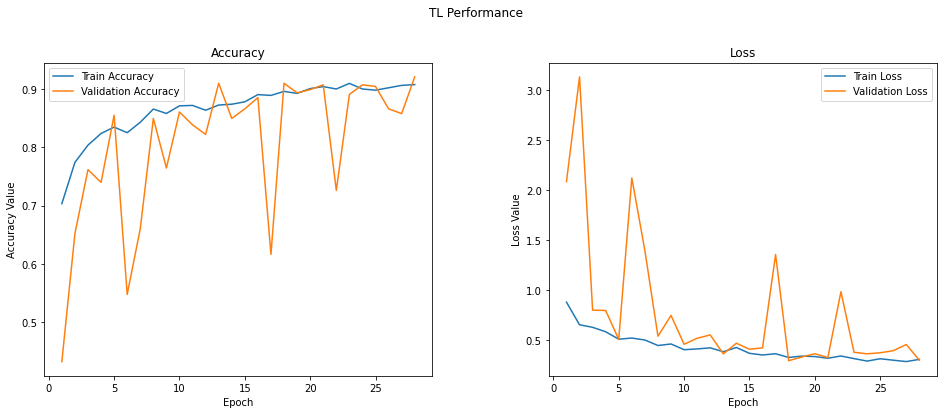

In [102]:
plot_performance_transfer_learning(history)

In [103]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_densenet = pd.DataFrame(results)
df_results_densenet.to_csv('submission_Densenet.csv',index=False) 

In [104]:
df_results_densenet.head()

image_id   healthy  multiple_diseases          rust      scab
0   Test_0  0.040482           0.091038  8.668034e-01  0.001677
1   Test_1  0.007719           0.091073  8.998302e-01  0.001378
2   Test_2  0.004015           0.000604  1.490112e-07  0.995381
3   Test_3  0.953547           0.024368  1.613664e-03  0.020471
4   Test_4  0.013672           0.025658  9.606286e-01  0.000041

In [ ]:
# 0.908

### Inception Resnet v2

In [59]:
model = construct_transfer_learning_model('InceptionResNetV2')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=4),
                    steps_per_epoch = x_train.shape[0] // 4,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint2, early2,reduce_lr])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/120
364/364 [==============================] - 202s 556ms/step - loss: 0.9925 - acc: 0.6353 - val_loss: 0.9618 - val_acc: 0.6822

Epoch 00001: val_loss improved from inf to 0.96178, saving model to CNN.h5
Epoch 2/120
364/364 [==============================] - 139s 382ms/step - loss: 0.8021 - acc: 0.7260 - val_loss: 1.2931 - val_acc: 0.4822

Epoch 00002: val_loss did not improve from 0.96178
Epoch 3/120
364/364 [==============================] - 139s 383ms/step - loss: 0.8737 - acc: 0.6765 - val_loss: 3.9764 - val_acc: 0.4301

Epoch 00003: val_loss did not improve from 0.96178
Epoch 4/120
364/364 [==============================] - 140s 385ms/step - loss: 0.7296 - acc: 0.7445 - val_loss: 1.4372 - val_acc: 0.7096

Epoch 00004: val_loss did not improve from 0.96178
Epoch 5/120
364/364 [==============================] - 139s 383ms/step - loss: 0.6603 - acc: 0.7589 - val_loss: 0.5796 - val

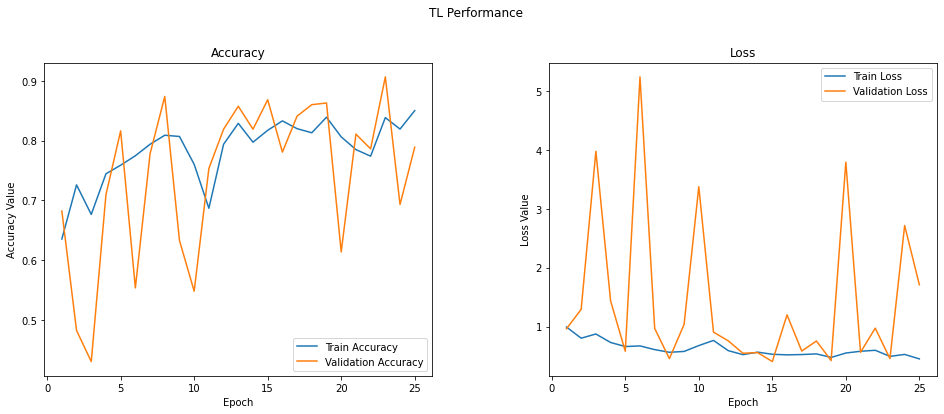

In [60]:
plot_performance_transfer_learning(history)

In [61]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_inceptionresnet = pd.DataFrame(results)
df_results_inceptionresnet.to_csv('submission_inceptionresnet.csv',index=False) 

In [62]:
df_results_inceptionresnet.head()

image_id   healthy  multiple_diseases          rust      scab
0   Test_0  0.001512       3.821075e-02  9.580129e-01  0.002264
1   Test_1  0.010988       8.840214e-02  8.744031e-01  0.026207
2   Test_2  0.061048       2.435957e-02  3.733493e-04  0.914219
3   Test_3  0.944764       1.125623e-02  3.051554e-03  0.040928
4   Test_4  0.086048       1.504751e-09  8.806108e-22  0.913952

In [ ]:
# 0.845

### Efficient_net

In [54]:
def efficientnet():  
    
    base_model = EfficientNetB6(weights='imagenet',input_shape=(150,150,3),include_top=False,pooling='max')

    base_model.trainable = True
    for layer in base_model.layers[:-1] :
        layer.trainable = True

    x=base_model.output

    x=Dense(512,activation='relu')(x) 
    x=Dense(64,activation='relu')(x) 
    preds=Dense(4,activation='softmax')(x) 
    model=Model(inputs=base_model.input,outputs=preds)
    model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    
    return model

In [55]:
model = efficientnet()  
model.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 75, 75, 56)   1512        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 75, 75, 56)   224         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 75, 75, 56)   0           stem_bn[0][0] 

In [56]:
model = efficientnet()  
#model = construct_transfer_learning_model('EfficientNet')
history = model.fit_generator(data_gen.flow(x_train,y_train,batch_size=4),
                    steps_per_epoch = x_train.shape[0] // 4,
                    epochs = 120,
                    verbose = True,
                    validation_data= (x_val,y_val),
                    callbacks = [checkpoint2, early2,reduce_lr])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/120
364/364 [==============================] - 274s 753ms/step - loss: 1.2559 - acc: 0.5804 - val_loss: 2.4078 - val_acc: 0.5205

Epoch 00001: val_loss improved from inf to 2.40784, saving model to CNN.h5
Epoch 2/120
364/364 [==============================] - 194s 532ms/step - loss: 0.8585 - acc: 0.7232 - val_loss: 0.4593 - val_acc: 0.8575

Epoch 00002: val_loss improved from 2.40784 to 0.45928, saving model to CNN.h5
Epoch 3/120
364/364 [==============================] - 193s 529ms/step - loss: 0.6272 - acc: 0.8125 - val_loss: 0.4746 - val_acc: 0.8849

Epoch 00003: val_loss did not improve from 0.45928
Epoch 4/120
364/364 [==============================] - 192s 528ms/step - loss: 0.5799 - acc: 0.8249 - val_loss: 0.3402 - val_acc: 0.9068

Epoch 00004: val_loss improved from 0.45928 to 0.34022, saving model to CNN.h5
Epoch 5/120
364/364 [==============================] - 193s 530ms/st

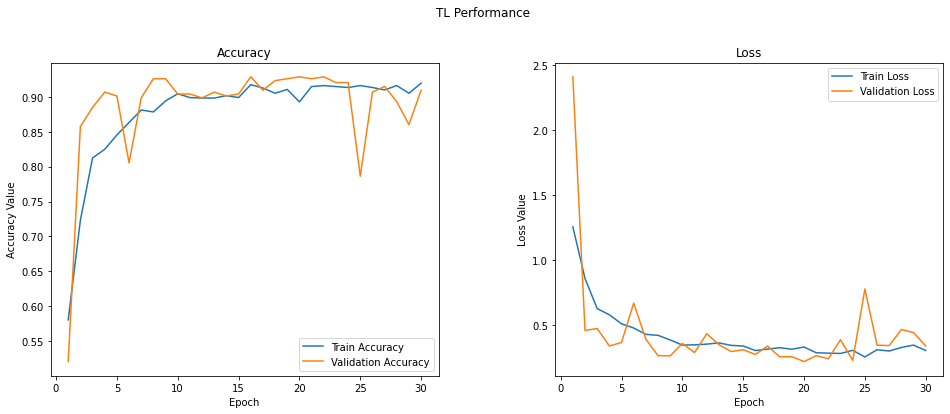

In [59]:
plot_performance_transfer_learning(history)

In [60]:
predictions = model.predict(x_test)
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test_csv.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_EfficientNet = pd.DataFrame(results)
df_results_EfficientNet.to_csv('submission_EfficientNet.csv',index=False) 

In [ ]:
# 0.913

In [61]:
#https://www.kaggle.com/tarunpaparaju/plant-pathology-2020-eda-models

# Ensemble Method

#https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

Simple ensemble method.
1. max voting
2. averaging
3. Weighted average

#Here I have used weighted average ensemble model

In [ ]:
df_predictions = 0.25*df_results_densenet + 0.25*df_results_inception + 0.25 * df_results_mobilenet + 0.25 * df_results_vgg16

df_pred  = pd.DataFrame(df_predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_ensemble = pd.DataFrame(results)
df_results_ensemble.to_csv('submissionStackNet.csv',index=False)

# Thank You